### Multinomial Logistic Regression Model

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pylab as pl
import statsmodels.api as sm

In [2]:
# Import csv
csvpath = os.path.join("data", "clean_data.csv")
data_df = pd.read_csv(csvpath)
data_df["id"] = data_df.index + 1
del data_df["Unnamed: 0"]
data_df.head()

,General Health,(%) of Population Under FPL,Eaten Fruits or Veggies Yesterday,Age Group,Race,Education,Insured,Exercise,Sex,Drinker,Smoker,id
0,4.0,2.0,2.0,4.0,2,3.0,1.0,1.0,0,0.0,0.0,1
1,4.0,3.0,2.0,2.0,4,2.0,1.0,1.0,0,0.0,0.0,2
2,4.0,2.0,1.0,5.0,1,4.0,1.0,1.0,1,1.0,1.0,3
3,2.0,1.0,2.0,5.0,1,2.0,1.0,1.0,0,0.0,0.0,4
4,3.0,1.0,2.0,4.0,1,4.0,1.0,1.0,0,1.0,1.0,5


In [3]:
# Modify DV for MNLM (Need to change base outcome to mid value)
# Ordinal relationship of values in this variable is not relevent in MNLM 
data_df["Unaltered Health"] = data_df["General Health"]
name_health = {"General Health": {5: "excellent", 4: "very good", 3: "good", 2: "fair", 1: "poor"}}
data_df.replace(name_health, inplace=True)
reposition_health = {"General Health": {"excellent" : 5, "very good" : 4, "fair" : 3, "poor" : 2, "good" : 1}}
data_df.replace(reposition_health, inplace=True)
data_df.head()

,General Health,(%) of Population Under FPL,Eaten Fruits or Veggies Yesterday,Age Group,Race,Education,Insured,Exercise,Sex,Drinker,Smoker,id,Unaltered Health
0,4,2.0,2.0,4.0,2,3.0,1.0,1.0,0,0.0,0.0,1,4.0
1,4,3.0,2.0,2.0,4,2.0,1.0,1.0,0,0.0,0.0,2,4.0
2,4,2.0,1.0,5.0,1,4.0,1.0,1.0,1,1.0,1.0,3,4.0
3,3,1.0,2.0,5.0,1,2.0,1.0,1.0,0,0.0,0.0,4,2.0
4,1,1.0,2.0,4.0,1,4.0,1.0,1.0,0,1.0,1.0,5,3.0


In [4]:
# Variable groups
y = data_df['General Health']

lifestyle = data_df.drop(['id', 'Unaltered Health', 'General Health','Sex', '(%) of Population Under FPL',
                          'Insured', 'Education', 'Race', 'Age Group'], axis = 1)

demo = data_df.drop(["General Health","Eaten Fruits or Veggies Yesterday",
                     "Education","Insured","Exercise","Drinker","Smoker","id","Unaltered Health"], axis = 1)

social = data_df.drop(["General Health","Eaten Fruits or Veggies Yesterday",
                       "Age Group","Race","Exercise","Sex","Drinker","Smoker","id","Unaltered Health"], axis = 1)

In [5]:
# Model uses "good health" as the base outcome. Model variables can be added by removing them from the "X" list.
#Lifestyle Mlogit
ls_Xc = sm.add_constant(lifestyle)
ls_mlogit = sm.MNLogit(y, ls_Xc)
ls_fmlogit = ls_mlogit.fit()
ls_rel_odds = (np.exp(ls_fmlogit.params))
ls_rel_odds = (np.exp(ls_fmlogit.params))
ls_rel_odds.columns = ["Poor Health", "Fair Health", "Very Good Health", "Excellent Health"]
ls_rel_odds
for row in range(5):
    for col in range(4):
        ls_rel_odds.iloc[row, col] = (((ls_rel_odds.iloc[row, col]) - 1)*100)
ls_rel_odds.pct_change()

print(ls_fmlogit.summary())

Optimization terminated successfully.
         Current function value: 1.459542
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:         General Health   No. Observations:                 7913
Model:                        MNLogit   Df Residuals:                     7897
Method:                           MLE   Df Model:                           12
Date:                Tue, 12 Jun 2018   Pseudo R-squ.:                 0.03381
Time:                        21:09:49   Log-Likelihood:                -11549.
converged:                       True   LL-Null:                       -11954.
                                        LLR p-value:                2.696e-165
                 General Health=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.1552      0.191     -0

/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:3967: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [6]:
# Show df of relative proportions
ls_rel_odds = ls_rel_odds.drop("const")
ls_rel_odds

,Poor Health,Fair Health,Very Good Health,Excellent Health
Eaten Fruits or Veggies Yesterday,-17.258887,-1.992897,45.169210,67.578440
Exercise,-58.803285,-28.542954,58.483574,65.482409
Drinker,-42.074798,-17.734620,28.739905,22.441285
Smoker,-42.074775,-17.734616,28.739896,22.441273


In [7]:
# Model uses "good health" as the base outcome. Model variables can be added by removing them from the "X" list.
# Demographic Mlogit
d_Xc = sm.add_constant(demo)
d_mlogit = sm.MNLogit(y, d_Xc)
d_fmlogit = d_mlogit.fit()
d_rel_odds = (np.exp(d_fmlogit.params))

d_rel_odds.columns = ["Poor Health", "Fair Health", "Very Good Health", "Excellent Health"]
d_rel_odds
for row in range(5):
    for col in range(4):
        d_rel_odds.iloc[row, col] = (((d_rel_odds.iloc[row, col]) - 1)*100)
d_rel_odds.pct_change()

print(d_fmlogit.summary())

Optimization terminated successfully.
         Current function value: 1.435891
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:         General Health   No. Observations:                 7913
Model:                        MNLogit   Df Residuals:                     7893
Method:                           MLE   Df Model:                           16
Date:                Tue, 12 Jun 2018   Pseudo R-squ.:                 0.04947
Time:                        21:09:50   Log-Likelihood:                -11362.
converged:                       True   LL-Null:                       -11954.
                                        LLR p-value:                7.917e-242
           General Health=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -5.6839      0.309    -18.417      0.000   

In [8]:
d_rel_odds = d_rel_odds.drop("const")
d_rel_odds

,Poor Health,Fair Health,Very Good Health,Excellent Health
(%) of Population Under FPL,29.134184,16.333374,-22.864294,-17.196987
Age Group,123.579009,57.104891,-16.629999,-22.290886
Race,21.321738,27.376483,-23.638771,-28.702720
Sex,-19.338686,-5.610373,2.930092,10.760609


In [9]:
# Model uses "good health" as the base outcome. Model variables can be added by removing them from the "X" list.
# Demographic Mlogit
s_Xc = sm.add_constant(social)
s_mlogit = sm.MNLogit(y, s_Xc)
s_fmlogit = d_mlogit.fit()
s_rel_odds = (np.exp(s_fmlogit.params))

s_rel_odds.columns = ["Poor Health", "Fair Health", "Very Good Health", "Excellent Health"]
s_rel_odds
for row in range(5):
    for col in range(4):
        s_rel_odds.iloc[row, col] = (((s_rel_odds.iloc[row, col]) - 1)*100)
s_rel_odds.pct_change()

print(s_fmlogit.summary())

Optimization terminated successfully.
         Current function value: 1.435891
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:         General Health   No. Observations:                 7913
Model:                        MNLogit   Df Residuals:                     7893
Method:                           MLE   Df Model:                           16
Date:                Tue, 12 Jun 2018   Pseudo R-squ.:                 0.04947
Time:                        21:09:50   Log-Likelihood:                -11362.
converged:                       True   LL-Null:                       -11954.
                                        LLR p-value:                7.917e-242
           General Health=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -5.6839      0.309    -18.417      0.000   

In [10]:
s_rel_odds = s_rel_odds.drop("const")
s_rel_odds

,Poor Health,Fair Health,Very Good Health,Excellent Health
(%) of Population Under FPL,29.134184,16.333374,-22.864294,-17.196987
Age Group,123.579009,57.104891,-16.629999,-22.290886
Race,21.321738,27.376483,-23.638771,-28.702720
Sex,-19.338686,-5.610373,2.930092,10.760609


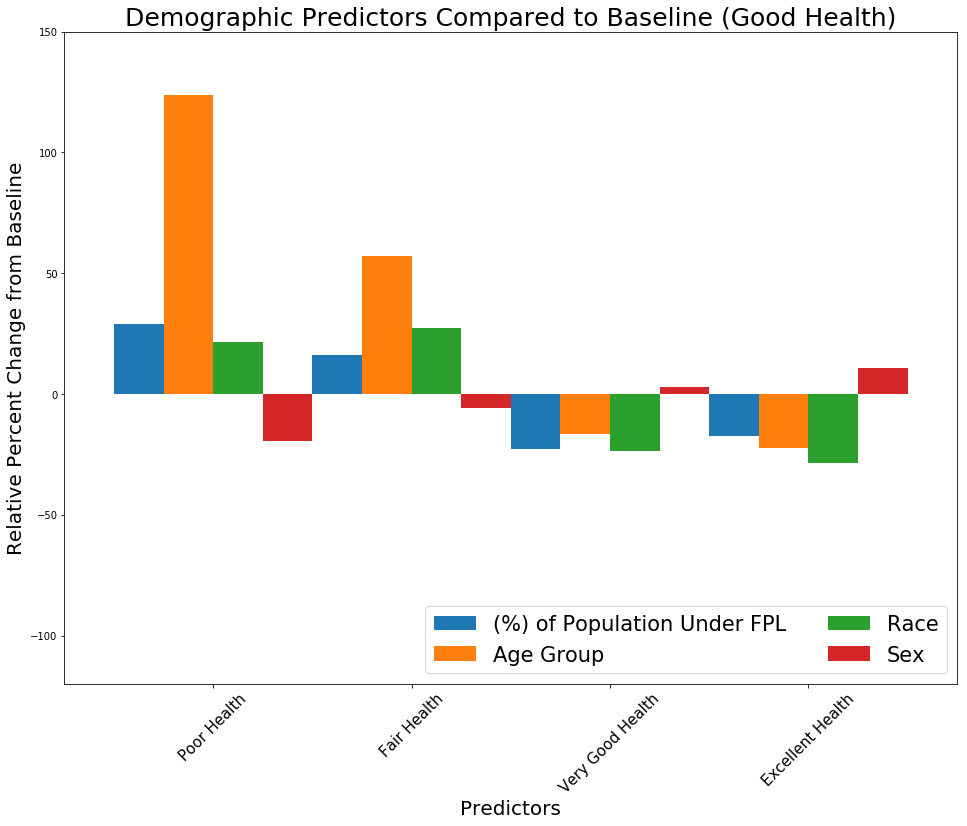

In [17]:
d_rel_odds.T.plot(kind='bar', figsize=(16, 12),width=1)
plt.title("Demographic Predictors Compared to Baseline (Good Health)", fontsize=25)
plt.xlabel("Predictors", fontsize=20)
plt.ylabel("Relative Percent Change from Baseline", fontsize=20)
plt.ylim(-120,150)
plt.xticks(rotation=45, fontsize=15)
plt.legend(loc="lower right", ncol=2, prop={'size': 21})
plt.savefig(f"demo.png")

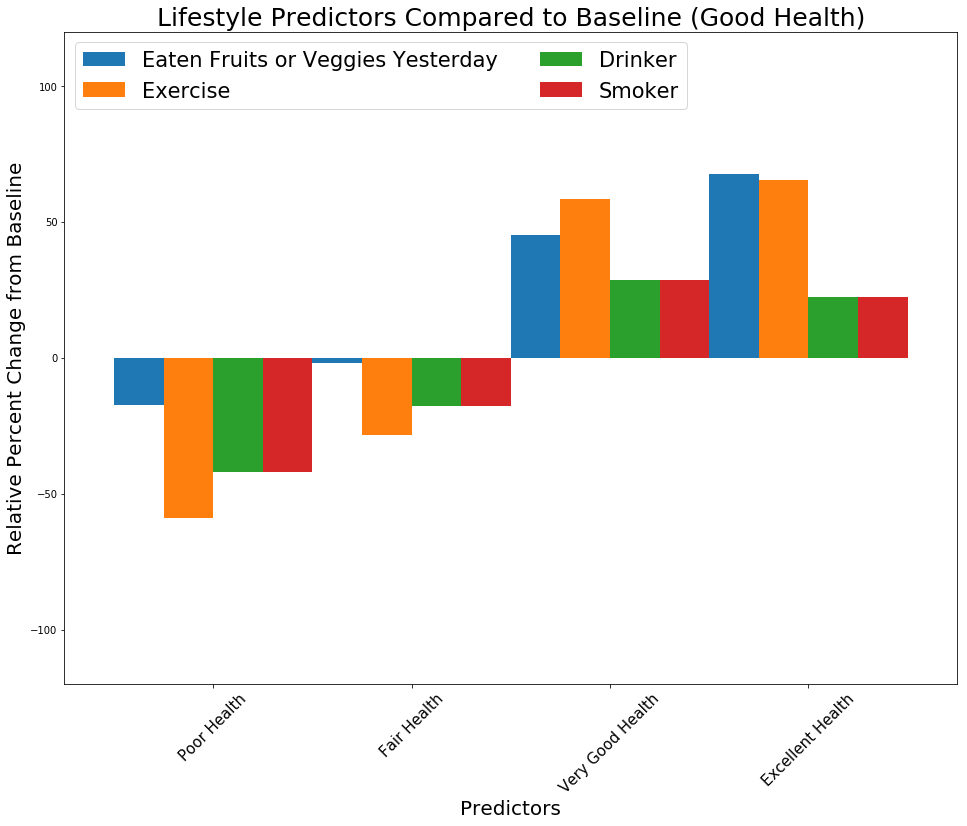

In [18]:
ls_rel_odds.T.plot(kind='bar', figsize=(16, 12),width=1)
plt.title("Lifestyle Predictors Compared to Baseline (Good Health)", fontsize=25)
plt.xlabel("Predictors", fontsize=20)
plt.ylabel("Relative Percent Change from Baseline", fontsize=20)
plt.ylim(-120,120)
plt.xticks(rotation=45, fontsize=15)
plt.legend(loc="upper left", ncol=2, prop={'size': 21})
plt.savefig(f"lifestyle.png")

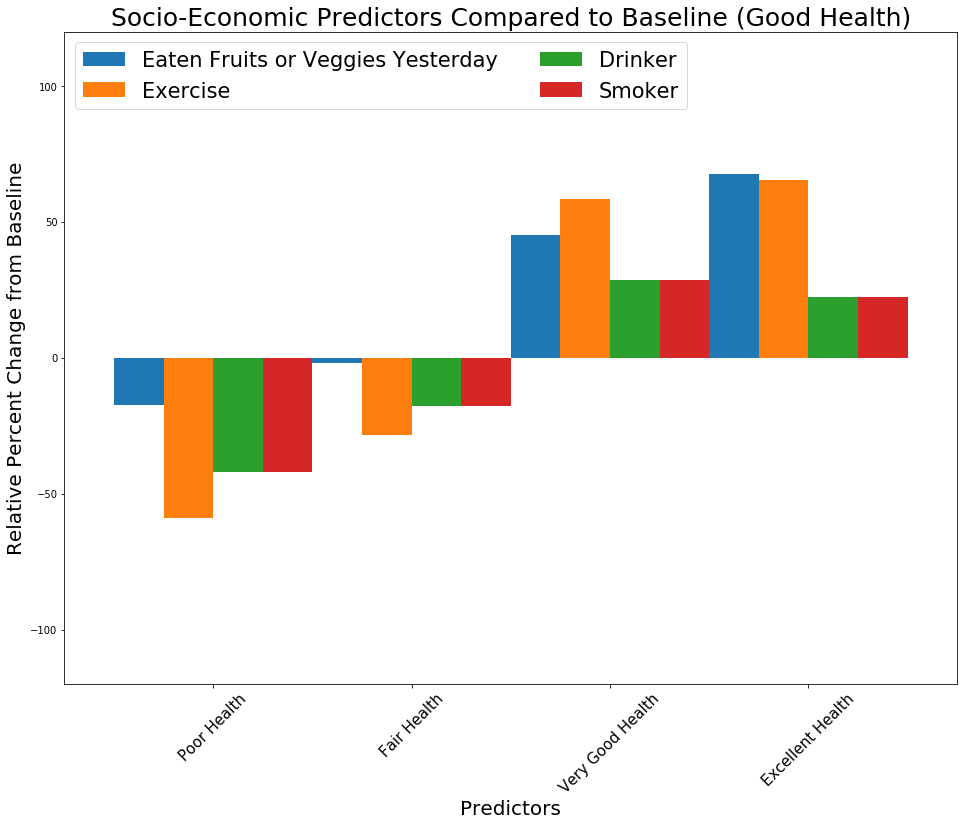

In [19]:
ls_rel_odds.T.plot(kind='bar', figsize=(16, 12),width=1)
plt.title("Socio-Economic Predictors Compared to Baseline (Good Health)", fontsize=25)
plt.xlabel("Predictors", fontsize=20)
plt.ylabel("Relative Percent Change from Baseline", fontsize=20)
plt.ylim(-120,120)
plt.xticks(rotation=45, fontsize=15)
plt.legend(loc="upper left", ncol=2, prop={'size': 21})
plt.savefig(f"se.png")